In [152]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from pandas import DataFrame
import IPython
import re
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [118]:
# 1) Gathering data by creating a pandas dataframe

cwd = os.getcwd()

df = pd.read_csv("cost_revenue_dirty.csv")
print(df.shape)
df.head()

(5391, 6)


,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [119]:
# 2) Preparing/cleaning data


# 2A) Renaming 

df = df.rename(columns={"Production Budget ($)": "production_budget_usd", "Worldwide Gross ($)": "worldwide_gross_usd", "Domestic Gross ($)": "domestic_gross_usd"})


# 2B) Removing rows with $0

columns_to_strip = ["production_budget_usd", "worldwide_gross_usd", "domestic_gross_usd"]

for col in columns_to_strip:
    # df[col].str.replace(r"\$,.*", "", regex=True).astype(int)
    df[col] = df[col].str.strip("$").str.replace(",", "").astype("float")


# 2C) Removing null/missing data

df.isnull().sum()
df.dropna(inplace=True)


# 2D) Removing duplicates

df.drop_duplicates(inplace=True)

In [120]:
df.describe()

,Rank,production_budget_usd,worldwide_gross_usd,domestic_gross_usd
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [165]:
# 3) Showing/assessing the relationship between Production Budget ($) and Worldwide Gross Revenue ($) as a linear regression.

X = DataFrame(df, columns = ["production_budget_usd"])
y = DataFrame(df, columns = ["worldwide_gross_usd"])

X_ = sm.add_constant(X)

model = sm.OLS(y, X_, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     worldwide_gross_usd   R-squared:                       0.552
Model:                             OLS   Adj. R-squared:                  0.552
Method:                  Least Squares   F-statistic:                     6649.
Date:                 Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                         01:32:42   Log-Likelihood:            -1.0760e+05
No. Observations:                 5391   AIC:                         2.152e+05
Df Residuals:                     5389   BIC:                         2.152e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -7.27e+06   1.94e+06     -3.756      0.000   -1.11e+07   -3.48e+06
production_budget_usd     3.0895      0.038     81.544      0.000       3.015       3.164
==============================================================================
Omnibus:                     4082.035   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180909.406
Skew:                           3.186   Prob(JB):                         0.00
Kurtosis:                      30.655   Cond. No.                     6.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
# 3) Showing/assessing the relationship between Production Budget ($) and Worldwide Gross Revenue ($) as a linear regression.

# 3A) Inspecting for linearity in a scatterplot

# X = DataFrame(df, columns = ["production_budget_usd"])
# y = DataFrame(df, columns = ["worldwide_gross_usd"])

In [129]:
# regression = LinearRegression()

In [130]:
# regression.fit(X, y)

LinearRegression()

In [137]:
# regression_coef = regression.coef_.flatten()
# print(f"The regression coeffcient is {round(regression_coef[0], 3)}, namely how much Worldwide Gross Revenue by $1 change in Production Budget ($).")
# regression_intercept = regression.intercept_.flatten()
# print(f"The regression intercept is {round(regression_intercept[0], 3)}.")

The regression coeffcient is 3.089, namely how much Worldwide Gross Revenue by $1 change in Production Budget ($).
The regression intercept is -7270258.42.


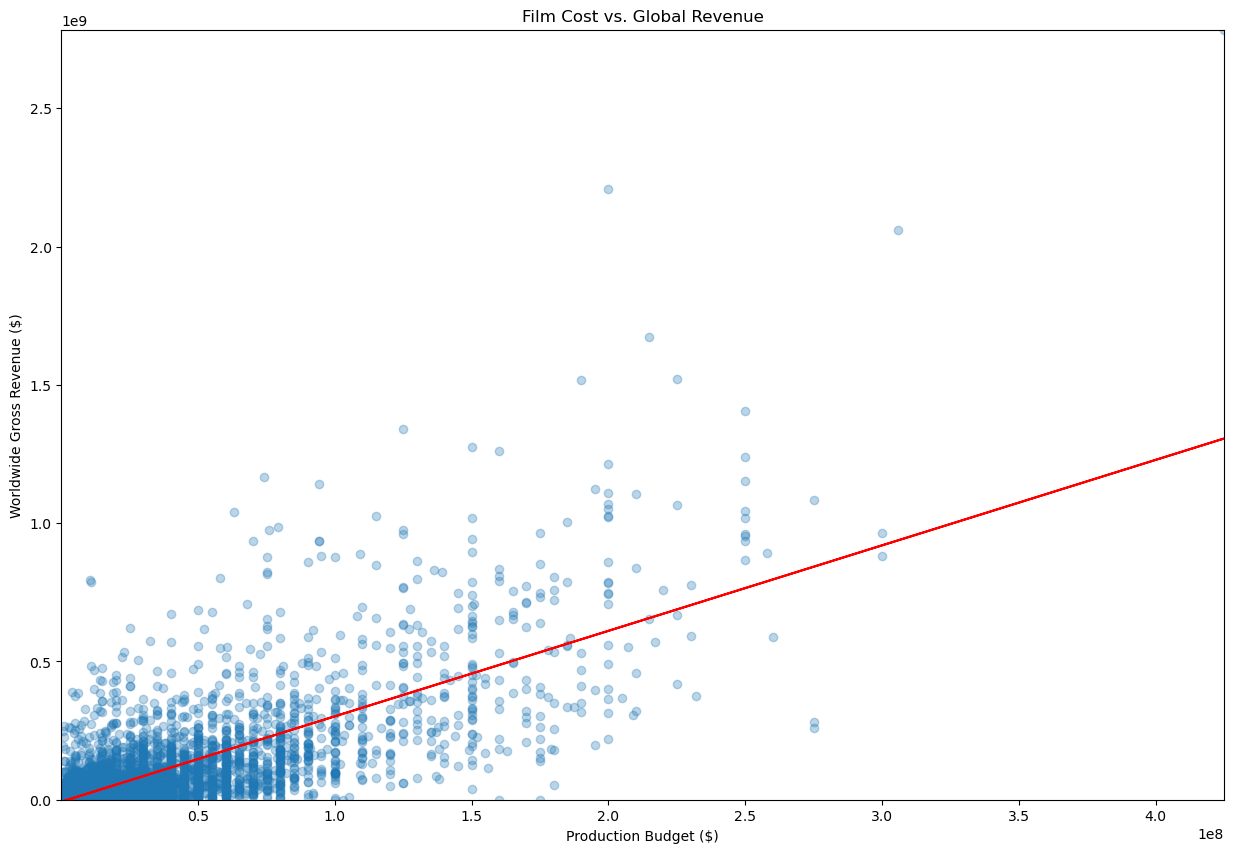

In [71]:
# 3A) Inspecting for linearity in a scatterplot

plt.figure(figsize=(15,10))

plt.scatter(X, y, alpha=0.3)
plt.plot(X, regression.predict(X), color="red")

plt.xlabel("Production Budget ($)")
plt.xlim(1.100000e+03, 4.250000e+08)
# plt.x # Set the ticks according to 5% of each value, so there would be 20 ticks for the x- and y-axes.

plt.ylabel("Worldwide Gross Revenue ($)")
plt.ylim(0, 2.783919e+09)

plt.title("Film Cost vs. Global Revenue")

plt.show()

In [160]:
# 3B) Showing that the residuals are independent

fitted_values = model_result.fittedvalues
residuals = model_result.resid
durbin_watson_stat = sm.stats.durbin_watson(residuals, axis=0)

print(durbin_watson_stat)

1.9119940543838412


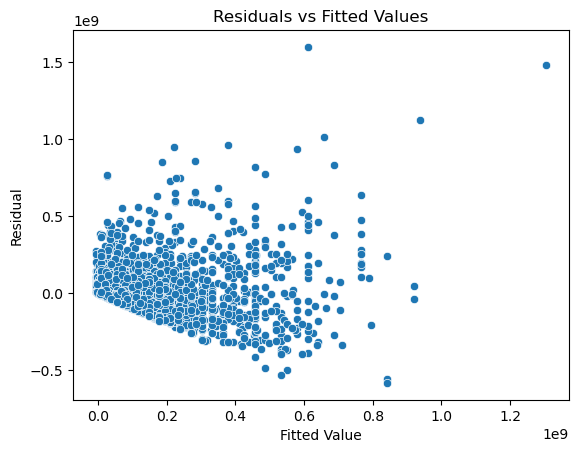

In [163]:
# 3C) Showing that the residuals display homoscedasticity (i.e. constant variance)

sns.scatterplot(data=y, x=fitted_values, y=residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.show()

In [162]:
# Using the Breusch-Pagan Test

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(residuals, model_result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', np.float64(745.3501370831518)),
 ('p-value', np.float64(4.11579137658933e-164)),
 ('f-value', np.float64(864.6135647896542)),
 ('f p-value', np.float64(2.18288280401089e-176))]

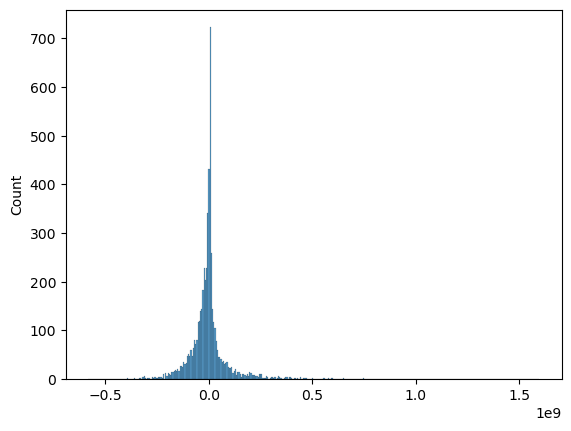

In [166]:
# 3D) Showing that the residuals are normally distributed

sns.histplot(model_result.resid)
plt.show()

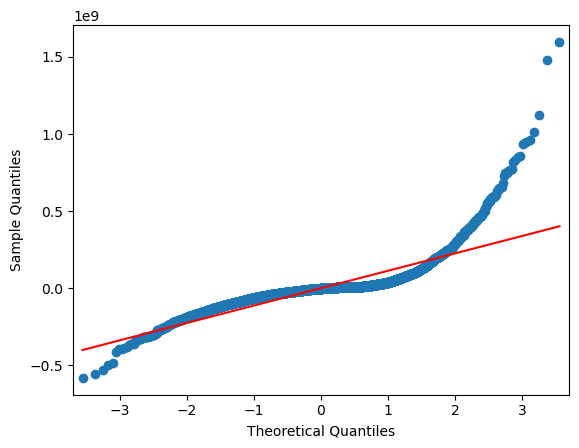

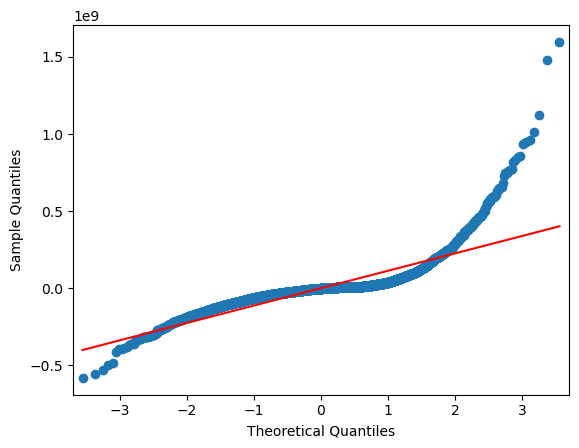

In [168]:
sm.qqplot(model_result.resid, line='s')

In [126]:
# 4) Measuring the strength of the linear regression 

print(round(regression.score(X, y), 3))

0.552
